# Data Definition

**Customer ID:** Unique number for each customer.

**Surname:** Customer's surname.

**Geography:** Customer's country.

**Gender:** The gender of the customer.

**Credit Score:** Customer's credit score.

**Age:** Customer's age.

**Tenure:** How many years has the person been a bank customer.

**Balance:** The amount in the account.

**Number of Products:** How many accounts, bank account affiliated products the person has.

**Credit Card:** Information whether the customer has a credit card or not.

**Active Status:** The customer's activity status.

**Estimated Salary:** The customer's estimated salary.

**Exited (churn):** Whether the customer has left.

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import brier_score_loss

# Data Overview

In [2]:
df = pd.read_csv("bank_customer.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Checking the data types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking the any missing values is existing or not

df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
# Checking the number of duplicated rows

df.duplicated().sum()

0

In [7]:
# Exited -> Churn

df.rename(columns = {'Exited':'Churned',}, inplace = True)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Statistical Overview

In [9]:
df.shape

(10000, 14)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
churn_rate = df.Churned.value_counts() / len(df)
print(" Leaving and non-leaving customer rates:\n\n",churn_rate[1],"\n",churn_rate[0])

 Leaving and non-leaving customer rates:

 0.2037 
 0.7963


[Text(0.5, 1.0, 'Correlation Matrix')]

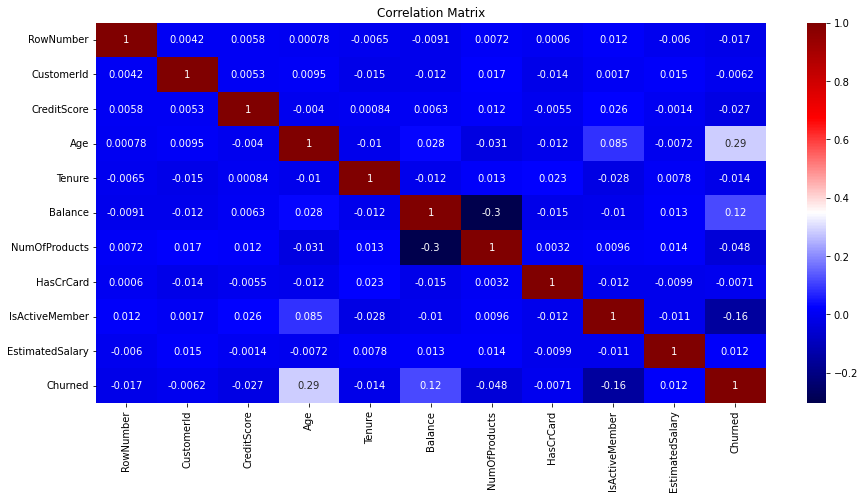

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='seismic').set(title='Correlation Matrix')

In [13]:
df.groupby("Churned").mean().iloc[:,2:]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Churned,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


***We wonder whether if not there is a statististical signifance difference between the mean of customer's tenure who's leaved and who's not.
To learn this we can apply a statistical test that name is two-sample t-test. To conduct a valid test data in each group must normally distributed and the variances for the two independent groups must equal.***

<d><i>T</i><sub>0</sub>:Tenures of customer who's not leaved

<d><i>T</i><sub>1</sub>:Tenures of customer who's leaved

**Hypothesis:**

<d><i>H</i><sub>0</sub>:  There is no difference between the distribution of <d><i>T</i><sub>0</sub> and the normal distribution.  
<d><i>H</i><sub>1</sub>:  There is difference between the distribution of <d><i>T</i><sub>0</sub> and the normal distribution.  

In [14]:
for_t0_normality_test = df.loc[(df['Churned'] == 0)]
for_t1_normality_test = df.loc[(df['Churned'] == 1)]

In [15]:
shapiro(for_t0_normality_test.Tenure)

C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9491610527038574, pvalue=0.0)

In [16]:
name = ['normality test', 'p-value']
test = shapiro(for_t0_normality_test.Tenure)
 
print(test, "\n") 
 
if test[1] > 0.05:
    print('We can not reject null hypothesis. There is enough evidence to say that T1 is normally distributed.')
 
else:
    print('We reject null hypothesis. There is no enough evidence to say that T1 is normally distributed.')

ShapiroResult(statistic=0.9491610527038574, pvalue=0.0) 

We reject null hypothesis. There is no enough evidence to say that T1 is normally distributed.


***Because of we reject the null hypothesis for <d><i>T</i><sub>0</sub> there is no need to check normality of <d><i>T</i><sub>1</sub> and Instead of two-sample t-test we will use Mann-Whitney U test which is non-parametric.***

<d><i>μ</i><sub>0</sub>: The mean of <d><i>T</i><sub>0</sub>

<d><i>μ</i><sub>1</sub>: The mean of <d><i>T</i><sub>1</sub>

<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub>

<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>≠<d><i>μ</i><sub>1</sub>

In [17]:
name = ['Mann Whitney-U', 'p-value']
test = stats.mannwhitneyu(for_t0_normality_test.Tenure, for_t1_normality_test.Tenure)
 
print(test, "\n") 
 
if test[1] > 0.05:
    print('We can not reject null hypothesis. There is enough evidence to say that there is no difference between μo and μ1.')
 
else:
    print('We reject null hypothesis. There is no enough evidence to say that there is no difference between μo and μ1.')


MannwhitneyuResult(statistic=8272055.5, pvalue=0.16219376122918827) 

We can not reject null hypothesis. There is enough evidence to say that there is no difference between μo and μ1.


In [18]:
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'The Distibution of Age')]

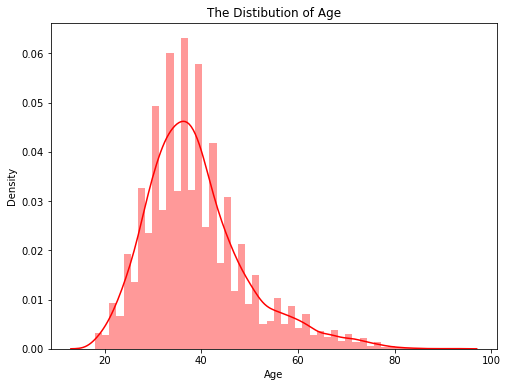

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'],color='red').set(title='The Distibution of Age')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'The Distibution of Balance')]

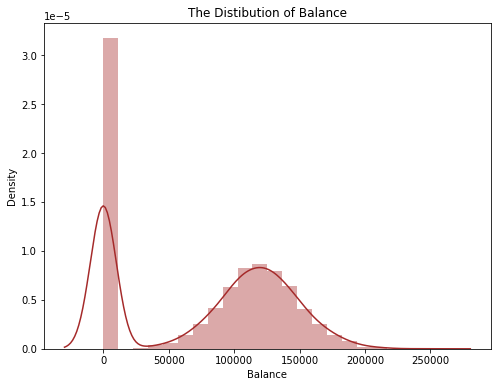

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(df['Balance'],color='brown').set(title='The Distibution of Balance')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\li

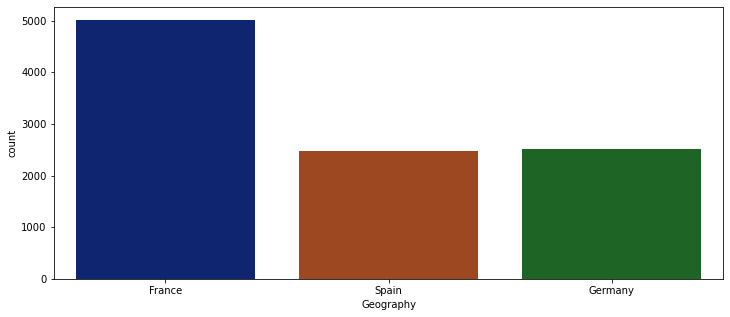

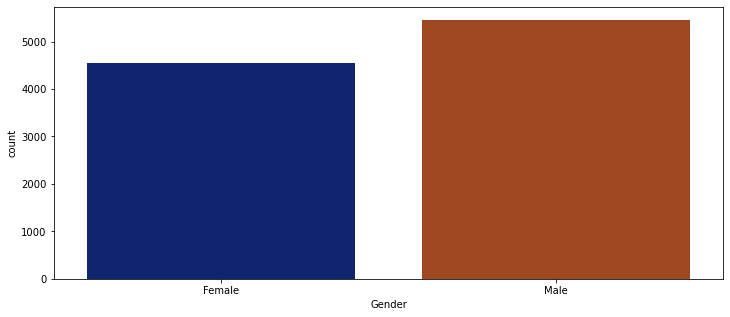

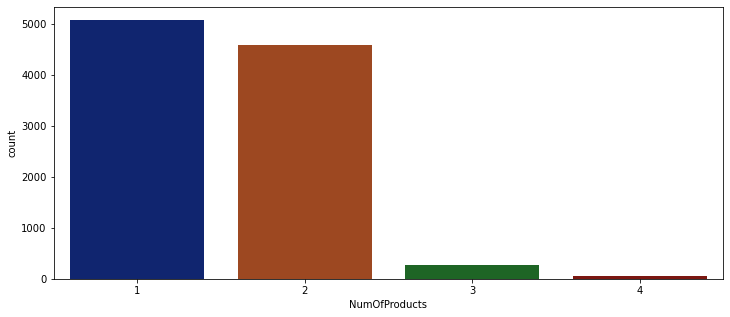

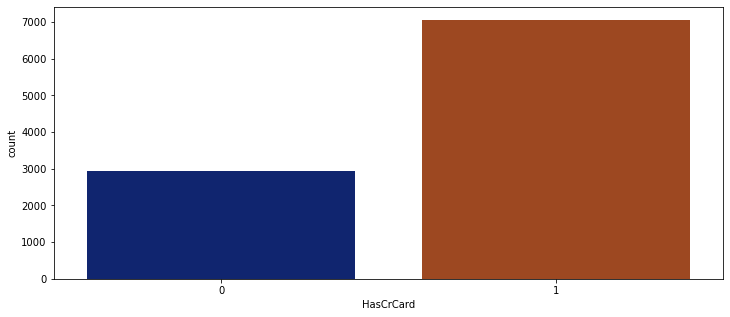

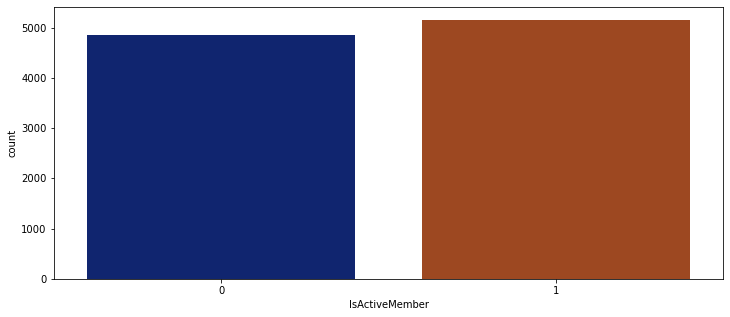

In [21]:
def graphic(values):
    plt.figure(figsize=(12,5))
    sns.countplot(df[values], palette='dark')
    plt.xticks(rotation=0)
    
variables = ['Geography', 'Gender','NumOfProducts','HasCrCard', 'IsActiveMember']
for values in variables:
    graphic(values)
    


# Preparing Data for Modeling

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df_model=df.iloc[:,3:]

In [24]:
df_model.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df_model = pd.get_dummies(df_model, columns = ['Geography'])
df_model.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [26]:
label_encoder = preprocessing.LabelEncoder()
  
df_model['Gender']= label_encoder.fit_transform(df_model['Gender'])
  
df_model.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,1,0,0


In [27]:
x = df_model.drop("Churned", axis=1)
y = df_model["Churned"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [29]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Churned            10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(3)
memory usage: 771.6 KB


In [30]:
df_model['Geography_France'] = df_model['Geography_France'].astype('int32')
df_model['Geography_Germany'] = df_model['Geography_Germany'].astype('int32')
df_model['Geography_Spain'] = df_model['Geography_Spain'].astype('int32')

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Churned            10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(4), int64(7)
memory usage: 859.5 KB


## Logistic Regression

In [31]:
LR= LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [32]:
predict_lr= LR.predict(x_test)

In [33]:
cm_lr= confusion_matrix(y_test, predict_lr)
print("\nLogistic Regression Confusion Matrix:\n")
print(cm_lr)


Logistic Regression Confusion Matrix:

[[2565   44]
 [ 660   31]]


In [34]:
print("Recall score:",recall_score(y_test, predict_lr))
print("\nPrecision score:",precision_score(y_test, predict_lr))
print("\nF1 score:",f1_score(y_test, predict_lr))

Recall score: 0.04486251808972504

Precision score: 0.41333333333333333

F1 score: 0.08093994778067885


In [35]:
target_names = ['Not Churned', 'Churned']
print(classification_report(y_test, predict_lr, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.80      0.98      0.88      2609
     Churned       0.41      0.04      0.08       691

    accuracy                           0.79      3300
   macro avg       0.60      0.51      0.48      3300
weighted avg       0.72      0.79      0.71      3300



* Precision-Recall Curve

In [36]:
prc_model = LogisticRegression()
prc_model.fit(x_train, y_train)
probabilities_valid = prc_model.predict_proba(x_test) 
probabilities_one_valid = probabilities_valid[:, 1]

f1_list = []
for threshold in np.arange(0, 0.95, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(y_test, predicted_valid)
    recall = recall_score(y_test, predicted_valid)
    f1 = f1_score(y_test, predicted_valid)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.01 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.02 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.03 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.04 | Accuracy = 0.210, Completeness = 1.000 | F1 = 0.347
Threshold = 0.05 | Accuracy = 0.211, Completeness = 1.000 | F1 = 0.349
Threshold = 0.06 | Accuracy = 0.213, Completeness = 0.997 | F1 = 0.351
Threshold = 0.07 | Accuracy = 0.216, Completeness = 0.988 | F1 = 0.354
Threshold = 0.08 | Accuracy = 0.220, Completeness = 0.980 | F1 = 0.360
Threshold = 0.09 | Accuracy = 0.227, Completeness = 0.975 | F1 = 0.368
Threshold = 0.10 | Accuracy = 0.233, Completeness = 0.961 | F1 = 0.375
Threshold = 0.11 | Accuracy = 0.237, Completeness = 0.935 | F1 = 0.378
Threshold = 0.12 | Accuracy = 0.244, Completeness = 0.913 | F1 = 0.386
Threshold = 0.13 | Accuracy = 0.250, Completeness = 0.884 | F1 = 0.390
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precis

In [37]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(y_test, predicted_valid)
    if f1_list.max() == f1:
        best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", best_threshold)

Maximum f1 score is: 0.418 and best threshold is: 0.21


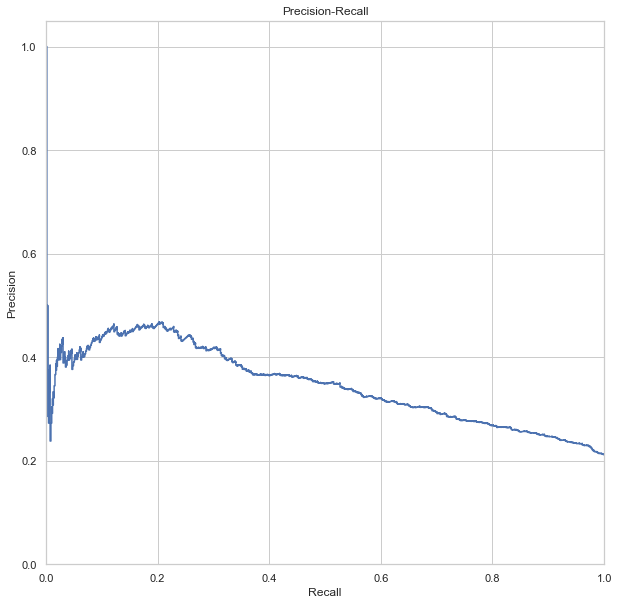

In [38]:
precision, recall, threshold = precision_recall_curve(y_test, probabilities_one_valid)

sns.set_theme(style= "whitegrid")
plt.figure(figsize=(10,10))
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show()

In [39]:
print('AUC score: %.3f' % average_precision_score(y_test, probabilities_one_valid)) 

AUC score: 0.347


In [40]:
last_model = LogisticRegression()
last_model.fit(x_train, y_train)

def custom_predict(X, threshold):
    probs = last_model.predict_proba(x_test) 
    return (probs[:, 1] > threshold).astype(int)
    
    
last_preds = custom_predict(X=x_test, threshold=best_threshold) 

In [41]:
# Alternative way for calculating auc score

'''
probs = last_model.predict_proba(x_test)
last_model_probs = probs[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, last_model_probs)
auc_score = metrics.auc(recall, precision)
print('AUC score: %.3f' % auc_score)
'''

"\nprobs = last_model.predict_proba(x_test)\nlast_model_probs = probs[:, 1]\n# calculate the precision-recall auc\nprecision, recall, _ = precision_recall_curve(y_test, last_model_probs)\nauc_score = metrics.auc(recall, precision)\nprint('AUC score: %.3f' % auc_score)\n"

In [42]:
cm_lr_last= confusion_matrix(y_test, last_preds)
print("\nLogistic Regression Confusion Matrix:\n")
print(cm_lr_last)


Logistic Regression Confusion Matrix:

[[1680  929]
 [ 263  428]]


In [43]:
print("Recall score:",recall_score(y_test, last_preds))
print("\nPrecision score:",precision_score(y_test, last_preds))
print("\nF1 score:",f1_score(y_test, last_preds))

Recall score: 0.6193921852387844

Precision score: 0.3154016212232867

F1 score: 0.41796875


In [44]:
target_names = ['Not Churned', 'Churned']
print(classification_report(y_test, last_preds, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.86      0.64      0.74      2609
     Churned       0.32      0.62      0.42       691

    accuracy                           0.64      3300
   macro avg       0.59      0.63      0.58      3300
weighted avg       0.75      0.64      0.67      3300



In [45]:
print("Brier score:",brier_score_loss(y_test, last_model.predict_proba(x_test)[:, 1]))

Brier score: 0.1546111761912857


* Model Tuning

In [46]:
lr_prmt = {"penalty": ["l1", "l2", "elastic_net", "none"],
           "C": [1, 5, 10, 0.5, 0.1, 0.05],
           "class_weight": ["balanced", "weight"],
           "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }

In [47]:
lr_cv_model = GridSearchCV(LR, 
                           lr_prmt, 
                           cv = 10, 
                            n_jobs = -1)

In [48]:
lr_cv_model.fit(x_train, y_train)

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueEr

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 0.5, 0.1, 0.05],
                         'class_weight': ['balanced', 'weight'],
                         'penalty': ['l1', 'l2', 'elastic_net', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [49]:
print("Best parameters:", lr_cv_model.best_params_)

Best parameters: {'C': 1, 'class_weight': 'weight', 'penalty': 'l2', 'solver': 'newton-cg'}


In [50]:
LR_tuned= LogisticRegression(C=lr_cv_model.best_params_["C"], 
                       class_weight=lr_cv_model.best_params_["class_weight"],
                       penalty=lr_cv_model.best_params_["penalty"],
                       solver=lr_cv_model.best_params_["solver"])

LR_tuned.fit(x_train, y_train)

C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The 

LogisticRegression(C=1, class_weight='weight', solver='newton-cg')

In [51]:
predict_lr_tuned= LR_tuned.predict(x_test)

cm_lr_tuned= confusion_matrix(y_test, predict_lr_tuned)
print("\nLogistic Regression Confusion Matrix:\n")
print(cm_lr_tuned)


Logistic Regression Confusion Matrix:

[[2534   75]
 [ 554  137]]


In [52]:
print("Recall score:",recall_score(y_test, predict_lr_tuned))
print("\nPrecision score:",precision_score(y_test, predict_lr_tuned))
print("\nF1 score:",f1_score(y_test, predict_lr_tuned))

Recall score: 0.19826338639652677

Precision score: 0.6462264150943396

F1 score: 0.3034330011074197


In [53]:
target_names = ['Not Churned', 'Churned']
print(classification_report(y_test, predict_lr_tuned, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.82      0.97      0.89      2609
     Churned       0.65      0.20      0.30       691

    accuracy                           0.81      3300
   macro avg       0.73      0.58      0.60      3300
weighted avg       0.78      0.81      0.77      3300



* Final Model

In [54]:
prc_model_final = LogisticRegression(C=lr_cv_model.best_params_["C"], 
                       class_weight=lr_cv_model.best_params_["class_weight"],
                       penalty=lr_cv_model.best_params_["penalty"],
                       solver=lr_cv_model.best_params_["solver"])
prc_model_final.fit(x_train, y_train)
probabilities_valid = prc_model_final.predict_proba(x_test) 
probabilities_one_valid = probabilities_valid[:, 1]

f1_list = []
for threshold in np.arange(0, 0.95, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(y_test, predicted_valid)
    recall = recall_score(y_test, predicted_valid)
    f1 = f1_score(y_test, predicted_valid)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The 

Threshold = 0.00 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.01 | Accuracy = 0.209, Completeness = 1.000 | F1 = 0.346
Threshold = 0.02 | Accuracy = 0.210, Completeness = 1.000 | F1 = 0.347
Threshold = 0.03 | Accuracy = 0.214, Completeness = 1.000 | F1 = 0.353
Threshold = 0.04 | Accuracy = 0.221, Completeness = 0.994 | F1 = 0.362
Threshold = 0.05 | Accuracy = 0.228, Completeness = 0.977 | F1 = 0.369
Threshold = 0.06 | Accuracy = 0.238, Completeness = 0.968 | F1 = 0.383
Threshold = 0.07 | Accuracy = 0.248, Completeness = 0.951 | F1 = 0.393
Threshold = 0.08 | Accuracy = 0.258, Completeness = 0.933 | F1 = 0.404
Threshold = 0.09 | Accuracy = 0.267, Completeness = 0.920 | F1 = 0.414
Threshold = 0.10 | Accuracy = 0.276, Completeness = 0.899 | F1 = 0.422
Threshold = 0.11 | Accuracy = 0.283, Completeness = 0.877 | F1 = 0.428
Threshold = 0.12 | Accuracy = 0.294, Completeness = 0.863 | F1 = 0.438
Threshold = 0.13 | Accuracy = 0.303, Completeness = 0.839 | F1 = 0.445
Thresh

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
f1_list = np.asarray(f1_list)
f1_list.max()

probabilities_valid = prc_model_final.predict_proba(x_test) 
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.95, 0.01):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(y_test, predicted_valid)
    if f1_list.max() == f1:
        best_threshold = threshold


print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", best_threshold)

Maximum f1 score is: 0.500 and best threshold is: 0.23


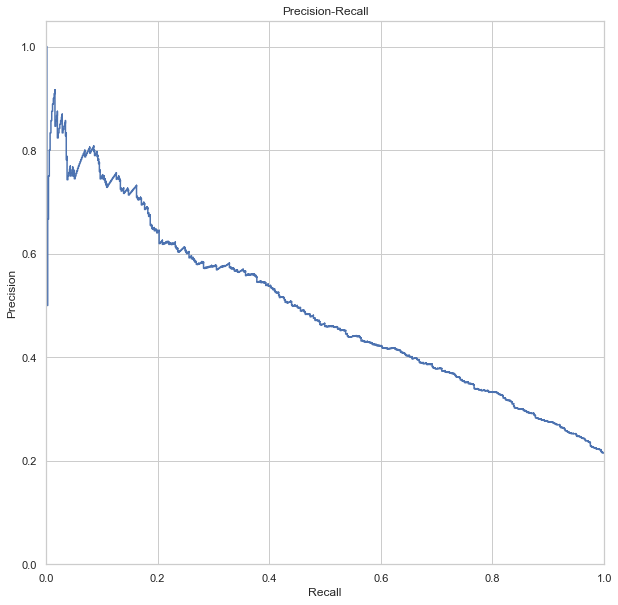

In [56]:
precision, recall, threshold = precision_recall_curve(y_test, probabilities_one_valid)

sns.set_theme(style= "whitegrid")
plt.figure(figsize=(10,10))
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show() 

In [57]:
print('AUC score: %.3f' % average_precision_score(y_test, probabilities_one_valid)) 

AUC score: 0.493


In [58]:
final_model = LogisticRegression(C=lr_cv_model.best_params_["C"], 
                       class_weight=lr_cv_model.best_params_["class_weight"],
                       penalty=lr_cv_model.best_params_["penalty"],
                       solver=lr_cv_model.best_params_["solver"])
final_model.fit(x_train, y_train)

def custom_predict(X, threshold):
    probs = final_model.predict_proba(x_test) 
    return (probs[:, 1] > threshold).astype(int)
    
    
final_preds = custom_predict(X=x_test, threshold=best_threshold) 

C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The 

In [59]:
cm_lr_final= confusion_matrix(y_test, final_preds)
print("\nLogistic Regression Confusion Matrix:\n")
print(cm_lr_final)


Logistic Regression Confusion Matrix:

[[1991  618]
 [ 255  436]]


In [60]:
print("Recall score:",recall_score(y_test, final_preds))
print("\nPrecision score:",precision_score(y_test, final_preds))
print("\nF1 score:",f1_score(y_test, final_preds))

Recall score: 0.6309696092619392

Precision score: 0.41366223908918404

F1 score: 0.49971346704871067


In [61]:
target_names = ['Not Churned', 'Churned']
print(classification_report(y_test, final_preds, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.89      0.76      0.82      2609
     Churned       0.41      0.63      0.50       691

    accuracy                           0.74      3300
   macro avg       0.65      0.70      0.66      3300
weighted avg       0.79      0.74      0.75      3300



In [62]:
print("Brier score:",brier_score_loss(y_test, final_model.predict_proba(x_test)[:, 1]))

Brier score: 0.13758562726105408
